# One more data analysis about coronavirus, but normalized...
Data of cases provided by https://github.com/CSSEGISandData/COVID-19

Global data (data/population.csv) from https://data.worldbank.org/indicator/SP.POP.TOTL

## Introduction
I coded this in order to follow figures about covid, for curiosity, without any goal else.

It would be very useful and interesting to know :
* the number of tests in each country (maybe the confirmed rate is underestimated) ;
* the fiability of figures of death (countries may hide some death).

I am not a data scientist, thanks for any tip you can give me to improve this code.

Take care,

Yann Marsaud

In [97]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
## Functions to clean and prepare data
######################################
## returns a dataframe with the sum of cases for the country_str from the data source src_data
## Country/Region is the new index of this dataframe (=country_str)
def sum_cases(src_data,country_str):
    multi = src_data[src_data["Country/Region"] == country_str]
    multi = multi.groupby(multi["Country/Region"]).sum()
    return multi

## Returns a dataframe with the selected 'countries' and the 'countries_group' 
 # (countries with more than one province)  
 # Index of the returned dataframe : 'Country/Region'
def prepare_data(data,countries,countries_group):
    # Loads data from countries ignoring provinces
    data_selected = data[data["Country/Region"].isin(countries) & data["Province/State"].isnull() ]
    data_selected = data_selected.set_index('Country/Region')
    # Agregates country with provinces in the final result
    for c in countries_group:
        data_selected = pd.concat([sum_cases(data,c),data_selected])
    # deleting useless fields
    data_selected = data_selected.drop(["Province/State"],axis=1) 
    # merge data with country names
    data_selected = data_selected.join(population.set_index('Country/Region'))
    return data_selected

# Returns data normalized to convert data for 10^n inhabitants and transposed
# Deletes the field Population
def normalize_and_timeserie(data_selected,n):
    data_norm = data_selected.copy()
    data_norm["Population"] = data_norm["Population"] / 10**n
    data_norm = data_norm.div(data_norm["Population"],axis=0)
    data_norm = data_norm.drop(["Population"],axis=1)
    data_norm = data_norm.transpose()
    data_norm.index = pd.to_datetime(data_norm.index)
    return data_norm
# Basis of normalization : for 10**n inhabitants
n = 7
# Path of imported data
# path = '../data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

In [102]:
## Geography
############
# importing data from population, updates data structure
population = pd.read_csv("data/population.csv",header=2)
population = population[["Country Name","2018"]]
population = population.rename(columns={"2018":"Population","Country Name":"Country/Region"}) 
# compatibility of names of country
population.at[249,'Country/Region']  = 'US' 
# selecting countries ignoring provinces
pays = ['France','Argentina','Chile','Italy','US','Spain','United Kingdom','Germany','Brazil']
# selecting countries with provinces
to_agregate = ['Canada','China'] 
# filtering selected countries
population = population[population["Country/Region"].isin(pays) | population["Country/Region"].isin(to_agregate)] 
#population.head()

## Confirmed cases (normalized)

In [103]:
data_confirmed = pd.read_csv(path+"time_series_covid19_confirmed_global.csv")
data_confirmed = data_confirmed.drop(["Lat","Long"],axis=1) 
confirmed = prepare_data(data_confirmed,pays,to_agregate)
#confirmed.head()
#data_confirmed.head()
#data_confirmed[data_confirmed['Country/Region'] == 'Canada']

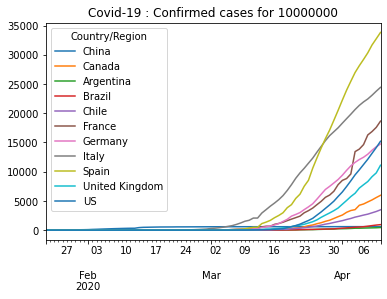

In [104]:
confirmed_norm = normalize_and_timeserie(confirmed,n)
title = "Covid-19 : Confirmed cases for "+str(10**n)
confirmed_norm.plot(title=title)

In [105]:
confirmed_norm.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-06,593.546488,4469.508617,349.256634,580.562311,2570.857422,14633.358231,12468.852896,21936.964431,29206.219092,7765.232151,11223.784163
2020-04-07,593.927035,4822.740929,365.887902,669.978741,2731.569382,16284.519425,12986.187140,22439.928926,30331.729654,8312.024386,12128.501972
2020-04-08,594.580428,5165.179282,385.440880,771.950708,2961.157895,16863.971148,13665.633116,23074.799542,31673.281828,9138.231364,13133.407268
2020-04-09,595.111759,5573.460785,403.420629,863.706383,3188.610701,17580.484627,14254.856193,23770.575369,32742.164271,9791.854222,14124.721594
2020-04-10,595.528207,5952.598598,443.875066,937.511936,3471.057965,18643.534424,14736.125401,24424.478863,33821.517574,11098.046679,15199.081645


## Death cases (normalized)

In [106]:
data = pd.read_csv(path+"time_series_covid19_deaths_global.csv")
data = data.drop(["Lat","Long"],axis=1) 
death = prepare_data(data,pays,to_agregate)
#death.head()
#data.head()
#data[data["Country/Region"] == "United Kingdom"]

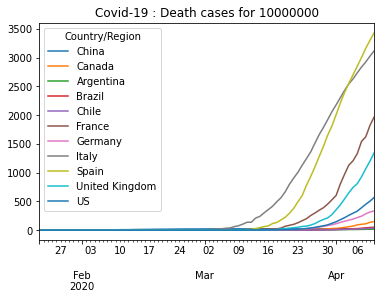

In [107]:
death_norm = normalize_and_timeserie(death,n)
title = "Covid-19 : Death cases for "+str(10**n)
death_norm.plot(title=title) 

In [108]:
death_norm.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-06,23.945776,91.478803,10.787850,26.925182,19.755291,1330.454598,218.320117,2734.610842,2850.851794,808.452030,330.070785
2020-04-07,23.945776,101.193367,12.585825,32.749424,22.958851,1542.019425,243.167600,2834.574829,3001.290266,926.718044,389.424143
2020-04-08,23.960136,109.828534,14.159053,39.098802,25.628485,1622.793293,283.333676,2924.277611,3160.917452,1067.854840,449.818250
2020-04-09,23.974496,135.734036,16.181775,45.352701,30.433826,1823.010958,314.453339,3025.234617,3300.885065,1200.415093,504.396402
2020-04-10,23.981676,150.305881,18.429243,50.460847,34.705240,1970.374743,333.752355,3119.571492,3436.365167,1347.871446,568.922899


## Rate death/confirmed

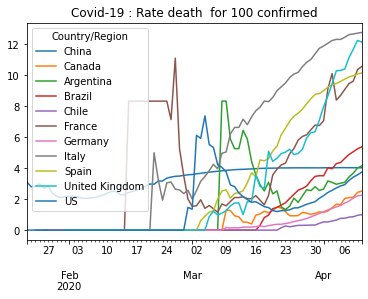

In [109]:
death_rate =  death_norm / confirmed_norm * 100
title = "Covid-19 : Rate death  for 100 confirmed"
death_rate.plot(title = title)

In [110]:
death_rate.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-06,4.034356,2.046731,3.088803,4.637776,0.768432,9.091929,1.750924,12.465767,9.761112,10.411177,2.940816
2020-04-07,4.031771,2.098254,3.439803,4.888129,0.840500,9.469235,1.872510,12.631835,9.894887,11.149126,3.210818
2020-04-08,4.029755,2.126326,3.673469,5.064935,0.865489,9.622842,2.073330,12.673036,9.979760,11.685575,3.424993
2020-04-09,4.028570,2.435364,4.011142,5.250940,0.954454,10.369515,2.205938,12.726804,10.081450,12.259324,3.571018
2020-04-10,4.026959,2.525046,4.151899,5.382422,0.999846,10.568676,2.264858,12.772315,10.160293,12.145123,3.743140
